In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# VISUALIZATION AND DATA EXPLORATION 

In [2]:
# Changement de l'affichage des float pour eviter e+..
pd.options.display.float_format = '{:.5f}'.format

df = pd.read_csv("./KaDo.csv")
df.head()

,TICKET_ID,MOIS_VENTE,PRIX_NET,FAMILLE,UNIVERS,MAILLE,LIBELLE,CLI_ID
0,35592159,10,1.67000,HYGIENE,HYG_DOUCHE JARDINMONDE,HYG_JDM,GD JDM4 PAMPLEMOUSSE FL 200ML,1490281
1,35592159,10,1.66000,HYGIENE,HYG_DOUCHE JARDINMONDE,HYG_JDM,GD JDM4 PAMPLEMOUSSE FL 200ML,1490281
2,35592159,10,7.45000,SOINS DU VISAGE,VIS_CJOUR Jeunes Specifique,VIS_JEUNE_ET_LEVRE,CR JR PARF BIO.SPE AC.SENT.50ML,1490281
3,35592159,10,5.95000,SOINS DU VISAGE,VIS_DEMAQ AAAR,VIS_AAAR_DEMAQLOTION,EAU MICELLAIRE 3 THES FL200ML,1490281
4,35592159,10,1.67000,HYGIENE,HYG_DOUCHE JARDINMONDE,HYG_JDM,GD JDM4 TIARE FL 200ML,1490281


In [3]:
# supression des valeurs vides
df.dropna(axis=0, inplace=True)

In [4]:
# Dimension nombre de ligne/commandes et nombre de colonne
df.shape

(7245522, 8)

In [5]:
# Vérification des types pour voir si il n'y a pas de conversion à faire
df.dtypes

TICKET_ID       int64
MOIS_VENTE      int64
PRIX_NET      float64
FAMILLE        object
UNIVERS        object
MAILLE         object
LIBELLE        object
CLI_ID          int64
dtype: object

In [6]:
# Nombre de client
nombre_clients = len(df["CLI_ID"].unique())
print(f"Nombre de client: {nombre_clients}")

Nombre de client: 853514


In [7]:
# Statistique général sur le prix
prix_max = df["PRIX_NET"].max()
prix_min = df["PRIX_NET"].min()
prix_moyen = df["PRIX_NET"].mean()
benef = df["PRIX_NET"].sum()

print(f"Prix max: {prix_max}€, min: {prix_min}€, moyen: {prix_moyen}€")
print(f"Bénéfice total: {benef}€")

Prix max: 1575.0€, min: 0.01€, moyen: 5.970083615783657€
Bénéfice total: 43256372.18000003€


In [8]:
# Statistique général sur les commandes
nombre_commande_max = df["CLI_ID"].value_counts().max()
nombre_commande_min = df["CLI_ID"].value_counts().min()
nombre_commande_moyen = df["CLI_ID"].value_counts().mean()

print(f"Par client, nombre max de commande: {nombre_commande_max}, min: {nombre_commande_min}, moyenne: {nombre_commande_moyen}")

Par client, nombre max de commande: 834, min: 1, moyenne: 8.489048802948751


In [9]:
# Commande la plus chère
df.loc[df["PRIX_NET"] == df["PRIX_NET"].max()]

,TICKET_ID,MOIS_VENTE,PRIX_NET,FAMILLE,UNIVERS,MAILLE,LIBELLE,CLI_ID
5085421,33107984,1,1575.00000,PARFUMAGE,PARF_PARF ET EAU DE PARF,PARF_PARFUM,EDP EVIDENCE VAPO 100ML,990122959


In [10]:
# Somme total dépensé par chaque client
df.groupby(['CLI_ID'])["PRIX_NET"].sum()

CLI_ID
1490281      18.40000
13290776     55.50000
20163348      7.45000
20200041      6.70000
20561854      7.05000
20727324     13.25000
20791601     23.80000
21046542    166.20000
21239163     12.65000
21351166      7.40000
21497331     33.35000
21504227      1.95000
21514622     17.90000
69813934    117.70000
71891681     44.25000
85057203     23.50000
85841284    162.25000
90822328     92.05000
93806295      6.00000
100023116     9.60000
100064590   108.30000
126716008    26.50000
131204016    37.85000
169985247   186.59000
191914645     7.50000
195207210   110.15000
206111880     6.15000
242424645     5.00000
243624087    31.15000
275493987   204.25000
               ...   
997048464   177.65000
997048472     5.00000
997048480   216.75000
997048498    89.80000
997048505     5.00000
997048513    31.85000
997048539    41.75000
997048547    43.95000
997048555    17.60000
997048563     8.90000
997048571    20.40000
997048589     3.50000
997048597   307.50000
997048604    15.95000
997

In [11]:
# Meilleur client
df.groupby("CLI_ID").agg({"PRIX_NET": "sum"}).sort_values(by='PRIX_NET', ascending=False).head(1)

,PRIX_NET
CLI_ID,
967051620,13536.95000


In [12]:
# Du mois le plus rentable au mois le moins rentable
df.groupby("MOIS_VENTE").agg({"PRIX_NET": "sum"}).sort_values(by='PRIX_NET', ascending=False)

,PRIX_NET
MOIS_VENTE,
12,5387936.22004
7,4209609.93002
6,4118695.03002
1,3922441.38002
5,3769628.89001
11,3485610.32001
9,3258067.86001
3,3200551.14001
4,3109273.54000


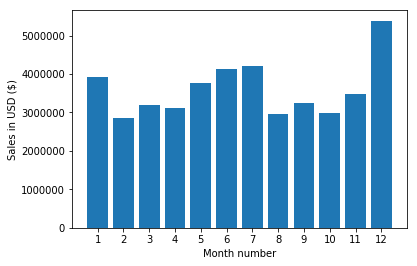

In [13]:
months = range(1,13)
plt.bar(months,df.groupby("MOIS_VENTE").agg({"PRIX_NET": "sum"})["PRIX_NET"])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

In [14]:
# Nombre de commande par mois
orders_by_month = df.groupby("MOIS_VENTE").agg({"TICKET_ID": pd.Series.nunique}).sort_values(by='TICKET_ID', ascending=False)
orders_by_month

,TICKET_ID
MOIS_VENTE,
12,319675
7,277379
6,258119
1,257093
9,230222
11,212741
5,212461
8,204879
3,198069


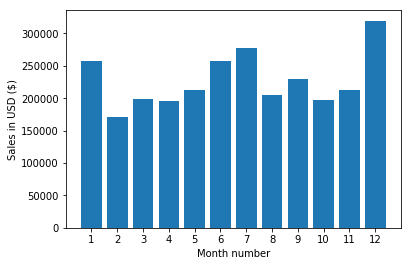

In [15]:
months = range(1,13)
plt.bar(months, df.groupby("MOIS_VENTE").agg({"TICKET_ID": pd.Series.nunique})["TICKET_ID"])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

In [16]:
# De la famille la plus rentable à la moins rentable
familly_by_month = df.groupby("FAMILLE").agg({"PRIX_NET": "sum"}).sort_values(by='PRIX_NET', ascending=False)
familly_by_month

,PRIX_NET
FAMILLE,
MAQUILLAGE,11222925.50996
SOINS DU VISAGE,10495566.72998
PARFUMAGE,8464166.30003
HYGIENE,5817376.74007
SOINS DU CORPS,4832397.53004
CAPILLAIRES,1256999.47999
SOLAIRES,1166788.94000
MULTI FAMILLES,136.00000
SANTE NATURELLE,14.95000


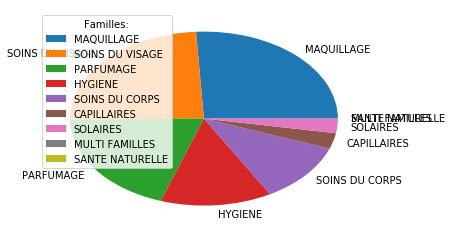

In [17]:
plt.pie(familly_by_month["PRIX_NET"], labels = familly_by_month.index)
plt.legend(title = "Familles:")
plt.show()

In [18]:
# Nombre de commande par famille
orders_by_familly = df.groupby("FAMILLE").agg({"TICKET_ID": pd.Series.nunique}).sort_values(by='TICKET_ID', ascending=False)
orders_by_familly

,TICKET_ID
FAMILLE,
MAQUILLAGE,1023978
SOINS DU VISAGE,982436
HYGIENE,963844
SOINS DU CORPS,654464
PARFUMAGE,512803
CAPILLAIRES,210136
SOLAIRES,119067
MULTI FAMILLES,29
SANTE NATURELLE,1


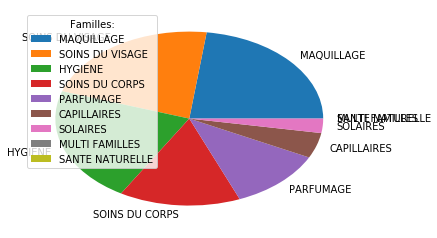

In [19]:
plt.pie(orders_by_familly["TICKET_ID"], labels = orders_by_familly.index)
plt.legend(title = "Familles:")
plt.show()

In [20]:
# Test pour voir si les données sont bien calculées
df.loc[df["FAMILLE"] == "SANTE NATURELLE"]

,TICKET_ID,MOIS_VENTE,PRIX_NET,FAMILLE,UNIVERS,MAILLE,LIBELLE,CLI_ID
6458712,33072287,1,14.95000,SANTE NATURELLE,DIETETIQUE,DIETETIQUE,SOIN COSM ORALE 3X10 CAPS RC2,993646584


In [21]:
# Liste unique des familles, univers, mailles, libellés
familles = df['FAMILLE'].unique()
print(f"familles ({len(familles)}):", familles, "\n")

univers = df['UNIVERS'].unique()
print(f"univers ({len(univers)}):", univers, "\n")

mailles = df['MAILLE'].unique()
print(f"mailles ({len(mailles)}):", mailles, "\n")

libelles = df['LIBELLE'].unique()
print(f"libelles ({len(libelles)}):", libelles, "\n")

familles (9): ['HYGIENE' 'SOINS DU VISAGE' 'PARFUMAGE' 'SOINS DU CORPS' 'MAQUILLAGE'
 'CAPILLAIRES' 'SOLAIRES' 'MULTI FAMILLES' 'SANTE NATURELLE'] 

univers (105): ['HYG_DOUCHE JARDINMONDE' 'VIS_CJOUR Jeunes Specifique' 'VIS_DEMAQ AAAR'
 'PARF_EAUX PARFUMS' 'CORPS_LAIT HUILE PLAISIRNATURE' 'HYG_DOUCHE PARFUMS'
 'CORPS_LAIT HUILE PARFUMS' 'MAQ_LEV RAL Brillance' 'CORPS_SOIN DES MAINS'
 'CAP_AP SHAMP' 'MAQ_ONG Vernis LUM' 'HYG_DOUCHE HOMMES' 'MAQ_LEV BRILLANT'
 'HYG_SAVONS' 'CORPS_LAIT HUILE AUTRES' 'CORPS_HYDRA NOURRISANT'
 'MAQ_TEINT Fard a joues' 'CORPS_SOIN PIEDS ET JAMBES'
 'VIS_MASQUE Jeunes Specifique' 'VIS_SOIN LEVRES' 'PARF_EAUX DE COLOGNE'
 'HYG_DEO CULTURE BIO' 'HYG_DOUCHE EDT ETE' 'VIS_TRAIT BIO'
 'HYG_DOUCHE HAMMAM' 'VIS_CJOUR BIO' 'CAP_SHAMP TRAITANT'
 'CORPS_EXFOLIANT CORPS' 'VIS_DEMAQ Jeunes Specifique' 'VIS_CJOUR AAAR'
 'MAQ_YEUX Fard' 'HYG_DOUCHE PLAISIRNATURE' 'VIS_DEMAQ BIO' 'VIS_DEMAQ PUR'
 'MAQ_LEV RAL Lum4' 'PARF_EAUX HOMMES' 'MAQ_LEV RAL GrdRouge'
 'HYG_DEO PARFUM

# Information client

# L'objectif est d'avoir les informations les plus utiles pour un client passé en paramètre

## Récupération du dataset associé au client

In [22]:
client_id = 1490281;
df_client = df.loc[df["CLI_ID"] == client_id]
df_client

,TICKET_ID,MOIS_VENTE,PRIX_NET,FAMILLE,UNIVERS,MAILLE,LIBELLE,CLI_ID
0,35592159,10,1.67000,HYGIENE,HYG_DOUCHE JARDINMONDE,HYG_JDM,GD JDM4 PAMPLEMOUSSE FL 200ML,1490281
1,35592159,10,1.66000,HYGIENE,HYG_DOUCHE JARDINMONDE,HYG_JDM,GD JDM4 PAMPLEMOUSSE FL 200ML,1490281
2,35592159,10,7.45000,SOINS DU VISAGE,VIS_CJOUR Jeunes Specifique,VIS_JEUNE_ET_LEVRE,CR JR PARF BIO.SPE AC.SENT.50ML,1490281
3,35592159,10,5.95000,SOINS DU VISAGE,VIS_DEMAQ AAAR,VIS_AAAR_DEMAQLOTION,EAU MICELLAIRE 3 THES FL200ML,1490281
4,35592159,10,1.67000,HYGIENE,HYG_DOUCHE JARDINMONDE,HYG_JDM,GD JDM4 TIARE FL 200ML,1490281


## Informations générales

In [23]:
# Est-ce un nouveau client
if df_client.shape[0] == 1: print("Nouveau client")
else: print("Client déjà enregistré")

Client déjà enregistré


In [24]:
# Nombre d'achat
df_client.shape[0]

5

In [25]:
# Dépense total
df_client["PRIX_NET"].sum()

18.399999999999999

In [26]:
# Liste des produits que le client a acheté
df_client["LIBELLE"].unique()

array(['GD JDM4 PAMPLEMOUSSE FL 200ML', 'CR JR PARF BIO.SPE AC.SENT.50ML',
       'EAU MICELLAIRE 3 THES FL200ML', 'GD JDM4 TIARE FL 200ML'], dtype=object)

In [27]:
# Liste des produits que le client a acheté et leur quantité
df_client.groupby("MAILLE").agg({"TICKET_ID": "count"})

,TICKET_ID
MAILLE,
HYG_JDM,3
VIS_AAAR_DEMAQLOTION,1
VIS_JEUNE_ET_LEVRE,1


In [28]:
# liste des familles des produits que le client a acheté
print(f'familles: {df_client["FAMILLE"].unique()}')
print(f'univers: {df_client["UNIVERS"].unique()}')
print(f'mailles: {df_client["MAILLE"].unique()}')

familles: ['HYGIENE' 'SOINS DU VISAGE']
univers: ['HYG_DOUCHE JARDINMONDE' 'VIS_CJOUR Jeunes Specifique' 'VIS_DEMAQ AAAR']
mailles: ['HYG_JDM' 'VIS_JEUNE_ET_LEVRE' 'VIS_AAAR_DEMAQLOTION']


# Recommandation

## Recommandation en fonction de la maille

In [29]:
# On va regarder la maille du produit et ansi proposé le produit le plus vendu dans cette maille.
# Si c'est déjà le premier alors on propose le suivant.
# Si le client à déjà acheté tous les produits de cette maille on lui propose le produit le
# plus vendu de l'univers associés.
# Si il a acheté plusieurs produits de maille différentes on regarde la maille la plus présente dans ces achats
# et on lui propose le produit le plus vendu dans cette mailles 

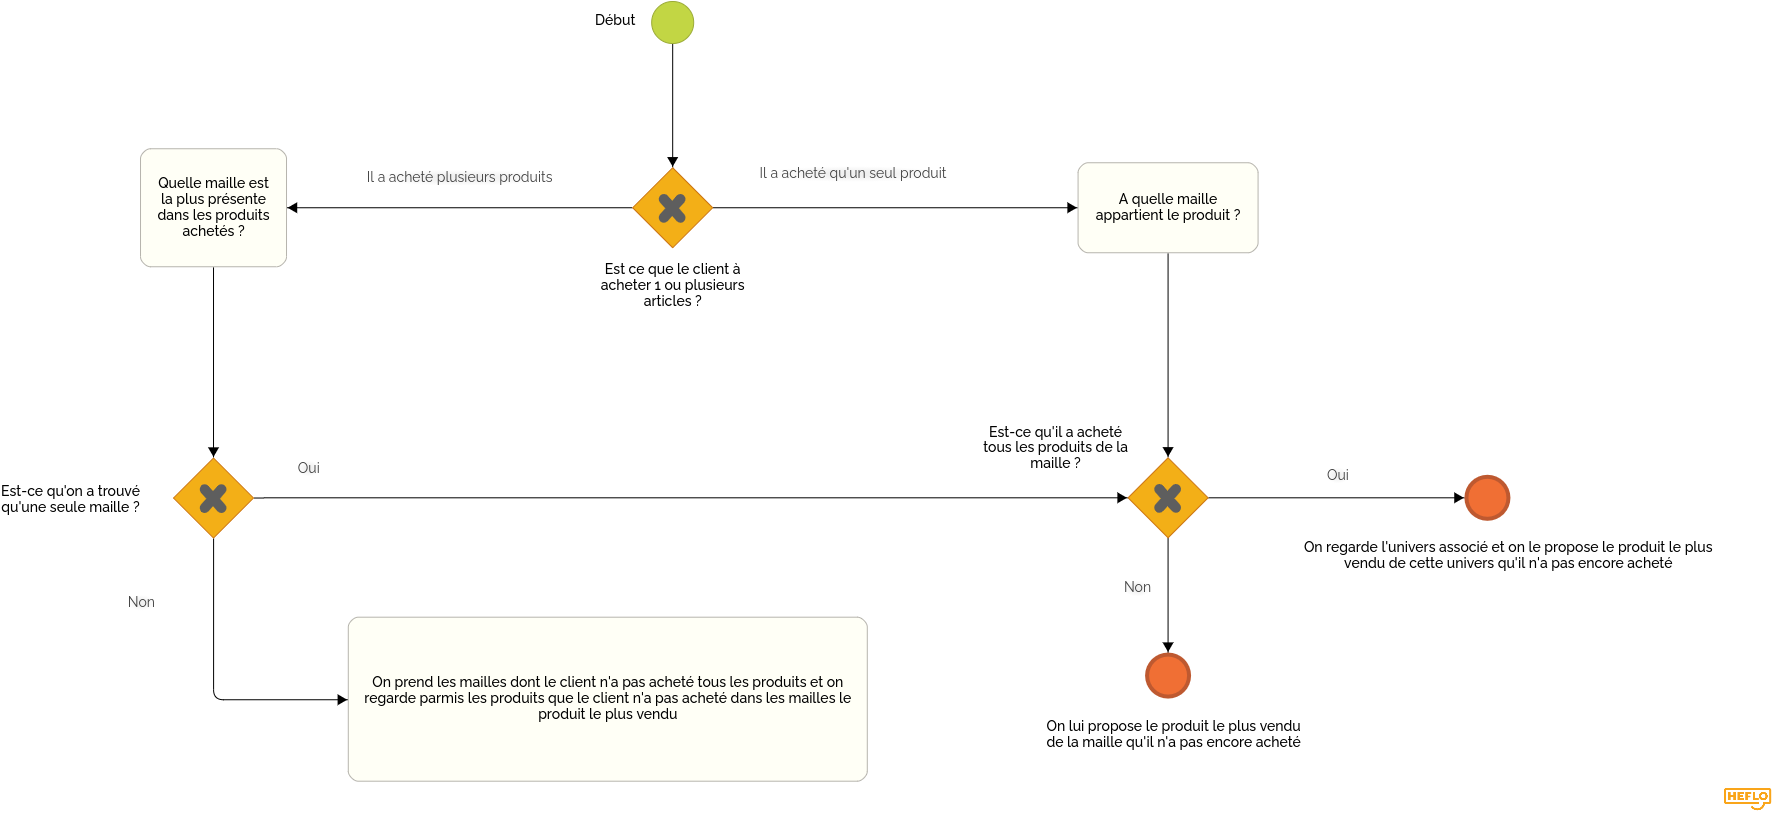

In [30]:
from IPython.display import Image
Image(filename='Recommandation produit maille Diagramme.png') 

In [31]:
## On récupère les informations du client
def get_customer_dataset(client_id):
       return df.loc[df["CLI_ID"] == client_id]
    
customer_dataset = get_customer_dataset(1490281)
customer_dataset

,TICKET_ID,MOIS_VENTE,PRIX_NET,FAMILLE,UNIVERS,MAILLE,LIBELLE,CLI_ID
0,35592159,10,1.67000,HYGIENE,HYG_DOUCHE JARDINMONDE,HYG_JDM,GD JDM4 PAMPLEMOUSSE FL 200ML,1490281
1,35592159,10,1.66000,HYGIENE,HYG_DOUCHE JARDINMONDE,HYG_JDM,GD JDM4 PAMPLEMOUSSE FL 200ML,1490281
2,35592159,10,7.45000,SOINS DU VISAGE,VIS_CJOUR Jeunes Specifique,VIS_JEUNE_ET_LEVRE,CR JR PARF BIO.SPE AC.SENT.50ML,1490281
3,35592159,10,5.95000,SOINS DU VISAGE,VIS_DEMAQ AAAR,VIS_AAAR_DEMAQLOTION,EAU MICELLAIRE 3 THES FL200ML,1490281
4,35592159,10,1.67000,HYGIENE,HYG_DOUCHE JARDINMONDE,HYG_JDM,GD JDM4 TIARE FL 200ML,1490281


In [32]:
# Est-ce que c'est ca première commande ?
def is_customer_first_order(customer_dataset):
       return customer_dataset.shape[0] == 1
    
is_first_order = is_customer_first_order(customer_dataset)
is_first_order

False

In [34]:
# Quelle sont les mailles la plus présentes parmi ses commandes ?
def get_maille_max_dataset(customer_dataset):
    mailles_count = df_client.groupby("MAILLE")["TICKET_ID"].size().reset_index(name='counts')
    return mailles_count[mailles_count["counts"] == mailles_count["counts"].max()]

maille_max_dataset = get_maille_max_dataset(customer_dataset)
maille_max_dataset

,MAILLE,counts
0,HYG_JDM,3


In [35]:
# Est-ce qu'il y a qu'un seul maille ?
def is_single_max_maille(maille_max_dataset):
    return True if len(maille_max_dataset) == 1 else False
print(is_single_max_maille(maille_max_dataset))

True


In [36]:
# On récupère le nom de la maille la plus présente
def get_maille_max(maille_max_dataset):
    return maille_max_dataset["MAILLE"][0]
maille_max = get_maille_max(maille_max_dataset)
maille_max

'HYG_JDM'

In [37]:
# On récupère tous les produits d'une maille
def get_maille_products(df, maille):
    return df[df["MAILLE"] == maille_max]["LIBELLE"].unique()

In [38]:
# On récupère la liste des produits que le client n'a pas acheté dans la maille
def get_customer_not_bought_maille_products(df, customer_dataset, maille_max):
    customer_maille_bought_products = customer_dataset[customer_dataset["MAILLE"] == maille_max]["LIBELLE"].unique()
    maille_products = get_maille_products(df, maille_max)
    return list(set(get_maille_products(df, maille_max)) - set(customer_maille_bought_products))

customer_not_bought_maille_products = get_customer_not_bought_maille_products(df, customer_dataset, maille_max)
customer_not_bought_maille_products

['DEO JDM PULPE ALOE VERA FL50ML',
 "GD JDM COTON D'INDE FL200ML",
 'DEO BILLE JDM LOTUS FL50ML',
 'GD JDM4 CIT VERT FL 200ML',
 'GD FLEUR DE TIARE JDM3 200ML',
 'DEO JDM4 COTON  FL50ML',
 'CD JDM4 COTON  FL 200ML',
 'GD JDM4 LOTUS FL200ML',
 'GD  CACAO AFRIQUE FL 200 ML JDM3',
 'GD FL YLANG COMORES 200ML JDM3',
 'GD JDM CITRON VERT  FL200ML',
 'GD  ORCHIDE DE MADAGASCAR FL 200 ML JDM3',
 'GD AMANDE DE CALIF JDM3 FL200ML',
 'BIO GD ARGAN FL200ML',
 'CD JDM4 MAGNOLIA FL 200ML',
 'DEO JDM LAVANDE PROVENCE FL50ML',
 'GD JDM4 ORANGE FL 200ML',
 'GD FL ORANGE FLORIDE 200 ML JDM3',
 'DEO JDM4 LAVANDIN FL50ML',
 'DEO JDM4 AMANDE FL 50 ML',
 'D LOTUS DU LAOS JDM3 200ML',
 'DEO BILLE JDM COTON FL50 ML',
 'BIO CD MAUVE FL200ML',
 'CD JDM MACADAMIA FL 200ML',
 'DEO JDM4 LOTUS FL50ML',
 'GD FL200ML JDM PAMPLEMOUSSE',
 'DEO BILLE VETIVER FL50ML',
 'CD JDM4 RIZ VIOLET FL200 ML',
 'CD JDM RIZ DU LAOS FL 200ML',
 'CD JDM4 MACADAMIA FL 200ML',
 'CD JDM4 AMANDE  FL 200ML',
 'GD JDM HOMME VETIVER FL200ML

In [40]:
# On récupère les 5 produits les plus vendu
def get_most_five_best_prodcuts_sell(df, products):
    five_most_products_sell = df[df["LIBELLE"].isin(customer_not_bought_maille_products)].groupby("LIBELLE")["TICKET_ID"].agg({"TICKET_ID": pd.Series.nunique}).sort_values(by='TICKET_ID', ascending=False).head(5).reset_index()
    return five_most_products_sell["LIBELLE"].tolist()
    
products_recommendation = get_most_five_best_prodcuts_sell(df, customer_not_bought_maille_products)
products_recommendation

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


['GD JDM4 LOTUS FL200ML',
 'GD JDM4 GRENADE FL200ML',
 'GD JDM4 LAVANDIN DE PROVENCE 200ML',
 'GD JDM4 CIT VERT FL 200ML',
 'CD JDM4 AMANDE  FL 200ML']

### Function final

In [42]:
def get_products_recommendation(client_id):
    customer_dataset = get_customer_dataset(client_id)
    maille_max_dataset = get_maille_max_dataset(customer_dataset)
    maille_max = get_maille_max(maille_max_dataset)
    customer_not_bought_maille_products = get_customer_not_bought_maille_products(df, customer_dataset, maille_max)
    return get_most_five_best_prodcuts_sell(df, customer_not_bought_maille_products)

get_products_recommendation(1490281)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


['GD JDM4 LOTUS FL200ML',
 'GD JDM4 GRENADE FL200ML',
 'GD JDM4 LAVANDIN DE PROVENCE 200ML',
 'GD JDM4 CIT VERT FL 200ML',
 'CD JDM4 AMANDE  FL 200ML']

## Recommandation en fonction de l'attribut de l'univers

In [43]:
# D'après l'annalyse des données (première partie) on peut segmenter les produits selon des caractéristiques
# précise tel que: homme, bio, monoi, jardinmonde, AAAR, Jeunes Specifique

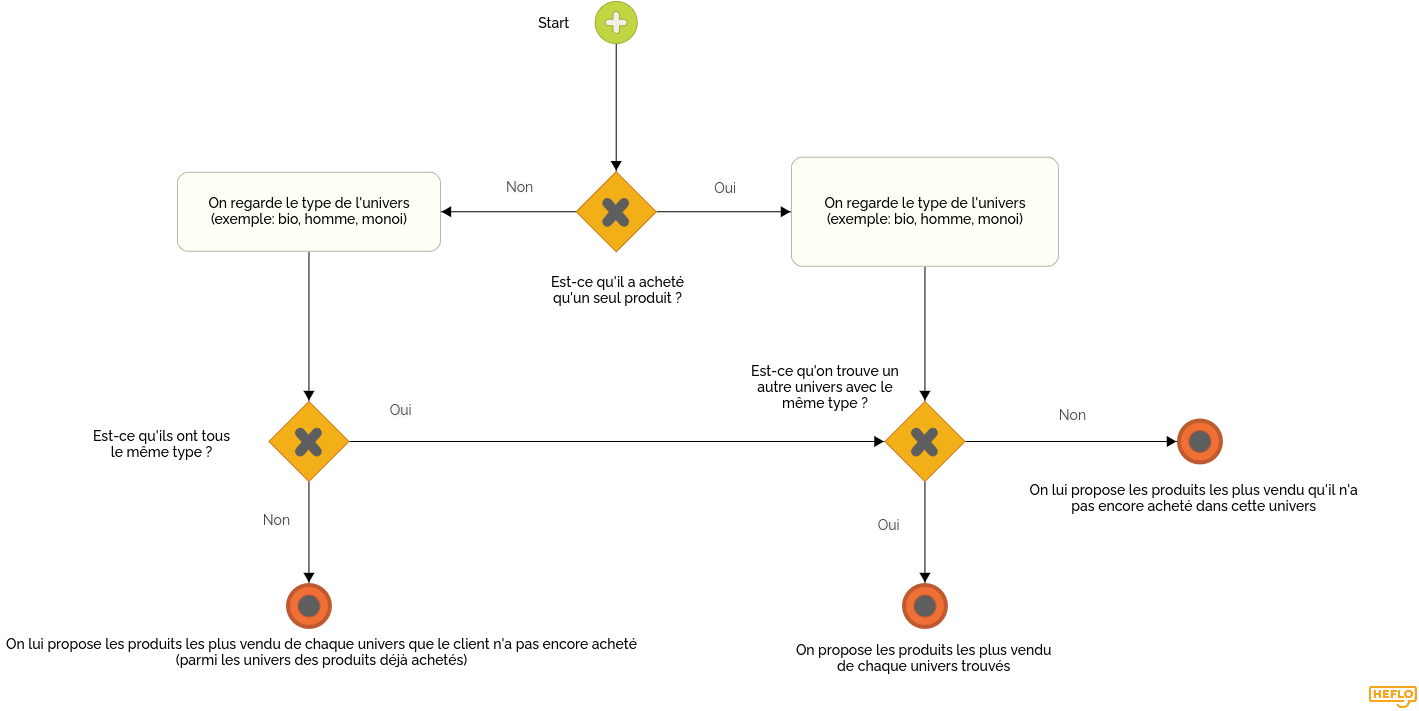

In [44]:
from IPython.display import Image
Image(filename='Recommandation par catégorie d\'univers Diagramme.png') 

In [45]:
## Liste de tous les univers
univers = df['UNIVERS'].unique()
print(f"univers ({len(univers)}):", univers, "\n")

univers (105): ['HYG_DOUCHE JARDINMONDE' 'VIS_CJOUR Jeunes Specifique' 'VIS_DEMAQ AAAR'
 'PARF_EAUX PARFUMS' 'CORPS_LAIT HUILE PLAISIRNATURE' 'HYG_DOUCHE PARFUMS'
 'CORPS_LAIT HUILE PARFUMS' 'MAQ_LEV RAL Brillance' 'CORPS_SOIN DES MAINS'
 'CAP_AP SHAMP' 'MAQ_ONG Vernis LUM' 'HYG_DOUCHE HOMMES' 'MAQ_LEV BRILLANT'
 'HYG_SAVONS' 'CORPS_LAIT HUILE AUTRES' 'CORPS_HYDRA NOURRISANT'
 'MAQ_TEINT Fard a joues' 'CORPS_SOIN PIEDS ET JAMBES'
 'VIS_MASQUE Jeunes Specifique' 'VIS_SOIN LEVRES' 'PARF_EAUX DE COLOGNE'
 'HYG_DEO CULTURE BIO' 'HYG_DOUCHE EDT ETE' 'VIS_TRAIT BIO'
 'HYG_DOUCHE HAMMAM' 'VIS_CJOUR BIO' 'CAP_SHAMP TRAITANT'
 'CORPS_EXFOLIANT CORPS' 'VIS_DEMAQ Jeunes Specifique' 'VIS_CJOUR AAAR'
 'MAQ_YEUX Fard' 'HYG_DOUCHE PLAISIRNATURE' 'VIS_DEMAQ BIO' 'VIS_DEMAQ PUR'
 'MAQ_LEV RAL Lum4' 'PARF_EAUX HOMMES' 'MAQ_LEV RAL GrdRouge'
 'HYG_DEO PARFUMS' 'MAQ_YEUX Mascara Basic' 'PARF_PARF ET EAU DE PARF'
 'MAQ_YEUX Mascara Specifique' 'MAQ_YEUX Crayons'
 'HYG_BAIN SEL HUILE PERLE' 'PARF_EAUX PLAIS

In [46]:
# On récupère tous les types d'univers sans doublon
def get_types_univers(univers):
    types = []
    for univers in univers:
        _t = univers.split(" ");
        _t.pop(0)
        types = types + _t
    return set(types)
types = get_types_univers(univers)
types

{'AAAR',
 'ANTI-AGE',
 'AUTRES',
 'Autres',
 'BIO',
 'BLEUET',
 'BRILLANT',
 'Basic',
 'Brillance',
 'CN',
 'COIFFURE',
 'COLOGNE',
 'CORPS',
 'CULTURE',
 'CULTUREBIO',
 'Correcteur',
 'Crayons',
 'DE',
 'DES',
 'EAU',
 'EDIT',
 'EDT',
 'ET',
 'ETE',
 'Elixir',
 'Eyeliner',
 'FAMILLES',
 'FRAICHEUR',
 'Fard',
 'Font',
 'GrdRouge',
 'HAMMAM',
 'HOMMES',
 'HUILE',
 'Hydr',
 'JAMBES',
 'JARDINMONDE',
 'Jeunes',
 'LA',
 'LEVRES',
 'LUM',
 'Lum4',
 'MAINS',
 'MINCEUR',
 'MONOI',
 'Mascara',
 'NATURE',
 'NOEL',
 'NOURRISANT',
 'PARF',
 'PARFUMS',
 'PERLE',
 'PIEDS',
 'PLAISIR',
 'PLAISIRNATURE',
 'PUR',
 'Perfect',
 'Poudres',
 'RAL',
 'RASAGE',
 'SEL',
 'SHAMP',
 'SOLAIRES',
 'SOLEIL',
 'SPECIFIQUE',
 'SexyPulp',
 'Sourcils',
 'Specifique',
 'Stylos',
 'TRAITANT',
 'TSCHEVEUX',
 'VEG',
 'Vernis',
 'Vertige',
 'a',
 'joues',
 'teint'}

In [47]:
## On récupère les informations du client
def get_customer_dataset(client_id):
       return df.loc[df["CLI_ID"] == client_id]
    
customer_dataset = get_customer_dataset(997048505)
customer_dataset

,TICKET_ID,MOIS_VENTE,PRIX_NET,FAMILLE,UNIVERS,MAILLE,LIBELLE,CLI_ID
7245329,35222351,8,5.00000,SOINS DU VISAGE,VIS_MASQUE PUR,VIS_PUR,GOMMAGE DOUCEUR PURE CAL 75ml,997048505


In [48]:
## On récupère les types associés au commandes du client
def get_customer_types(customer_dataset):
    types = []
    for index, order in customer_dataset.iterrows():
        _t = order["UNIVERS"].split(" ");
        _t.pop(0)
        types = types + _t
    return types

customer_types = get_customer_types(customer_dataset)
customer_types

['PUR']

In [49]:
## On récupère tous les univers correspondant au types
def get_univers_from_type(univers, customer_orders_univers, customer_types):
    res = []
    for univer in univers:
        if(univer not in customer_orders_univers):
            for _type in customer_types:
                if _type in univer:
                    res.append(univer)
    return res
similar_univers = get_univers_from_type(univers, customer_dataset["UNIVERS"].tolist(), customer_types)
similar_univers

['VIS_DEMAQ PUR', 'VIS_CJOUR PUR']

In [50]:
## On récupère le produit le plus vendu des univers
def get_most_products_sell(univers):
    products = []
    for univer in univers:
        df_univer =  df.loc[df["UNIVERS"] == univer]
        df_libelle = df_univer.groupby("LIBELLE")
        products.append(df_libelle.agg({"TICKET_ID": "count"}).sort_values(by='TICKET_ID', ascending=False)["TICKET_ID"].keys()[0])
    return products

get_most_products_sell(similar_univers)

['LINGETTES CALMILLE 2013', 'CR JOUR/NUIT PC pot50']

### Function final

In [51]:
def get_products_recommendation(client_id):
    customer_dataset = get_customer_dataset(client_id)
    customer_types = get_customer_types(customer_dataset)
    similar_univers = get_univers_from_type(univers, customer_dataset["UNIVERS"].tolist(), customer_types)
    return get_most_products_sell(similar_univers)
get_products_recommendation(997048505)

['LINGETTES CALMILLE 2013', 'CR JOUR/NUIT PC pot50']

## Recommandation en fonction des commandes similaires

In [52]:
# L'objectif est de chercher parmis les autres clients, le ou lesquelles ont les commandes la plus similaire

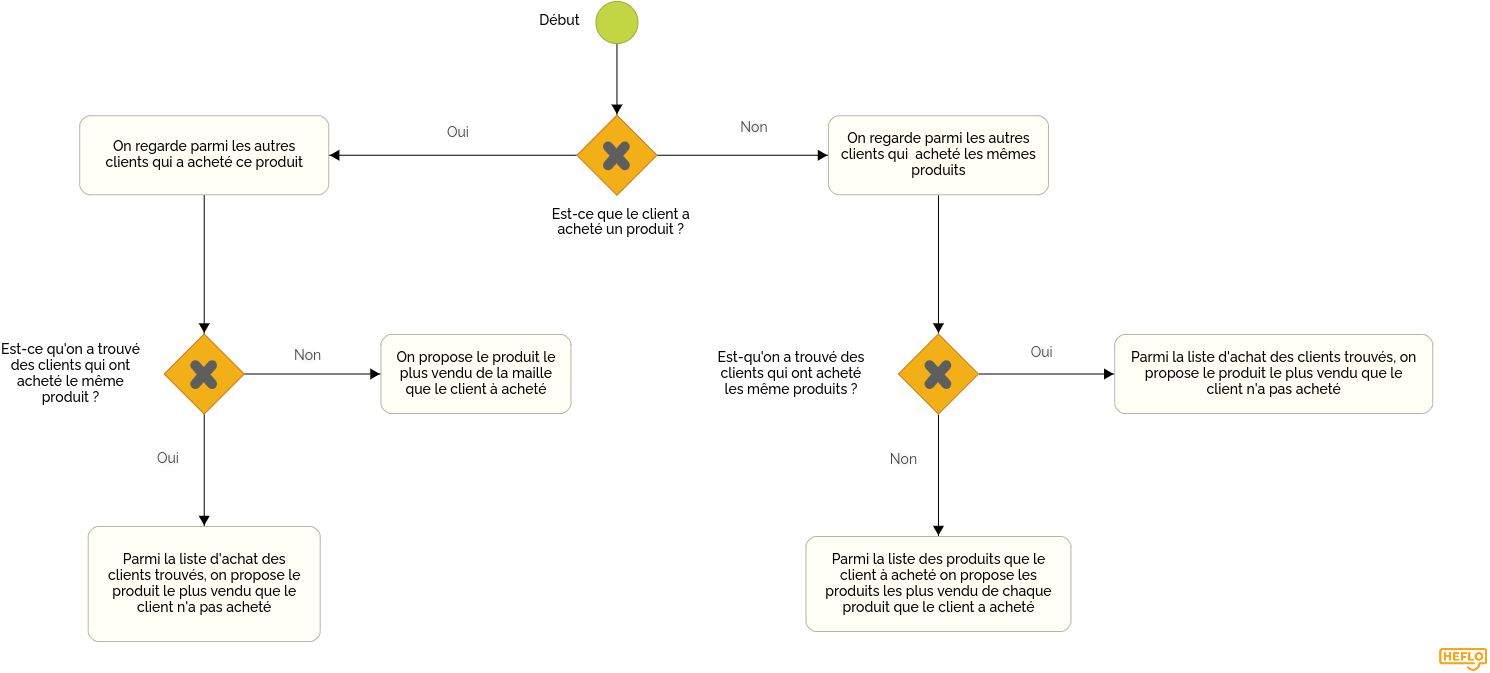

In [53]:
from IPython.display import Image
Image(filename='Recommandation en fonction des commandes similaires Diagramme.png') 